In [30]:
import tdms
import imp
imp.reload(tdms)
import plot
import functions
import numpy as np
import matplotlib
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Activation current-voltage relationship (I-V)

In [69]:
# data = tdms.read_tdms("/Volumes/DATA/data/tdms/D2-vc-060717-vc2-1.tdms")
# data = tdms.read_tdms("/Volumes/DATA/data/tdms/CHSL-6.8.1701-9VCLAMPNACURRENT.tdms")
# data = tdms.read_tdms("/Volumes/DATA/data/tdms/CHSL-6.8.1702-1.tdms")
data = tdms.read_tdms("/Users/Michael/Desktop/Ion Channels CSHL/Data/Lab11 Opto/Cell 3/Opto-cell3_opto_VoltageDependence-2-499117965.tdms")

In [70]:
holding = -60
erev = -30
lightpulsedelay = 500
lightpulsedur = 1500
vpulsedelay = 250
vpulsedur = 2000
print(data['dt'])

0.04


<IPython.core.display.Javascript object>


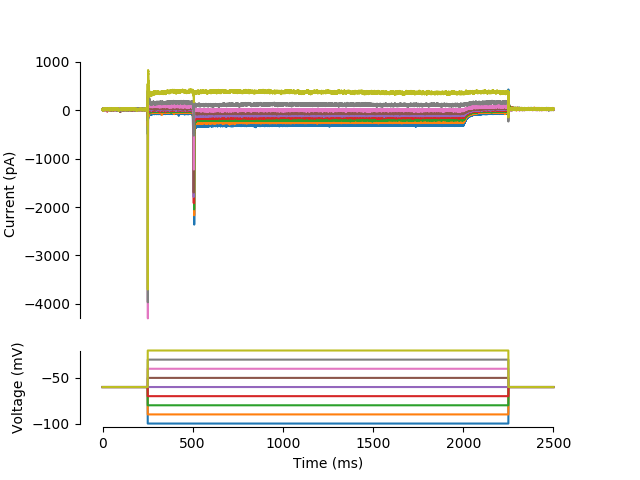

<IPython.core.display.Javascript object>


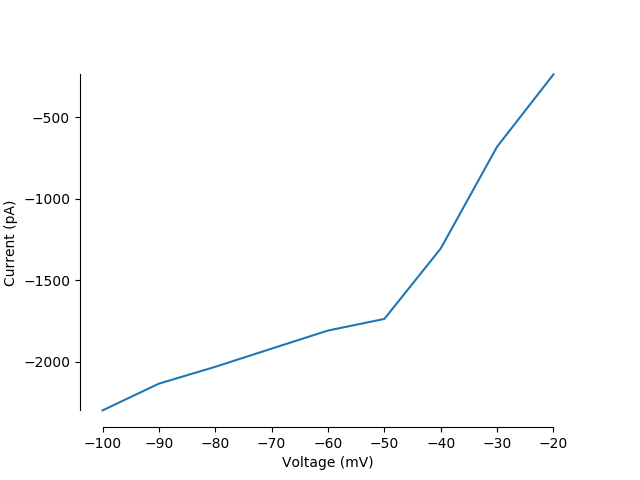

In [74]:
fig, axi, axv = plot.plot_traces(mode='vclamp')

pulses = []
peaks = []

dt = data['dt']
for sweep, vcommand, lightcommand in zip(data['AI0'][:-1], data['AO0'][:-1], data['AO1'][:-1]): 
    pulsebase = np.mean(vcommand[:int(vpulsedelay/dt)])
    pulsemax = np.max(vcommand[:int((vpulsedelay+vpulsedur)/dt)]-pulsebase)
    pulsemin = np.min(vcommand[:int((vpulsedelay+vpulsedur)/dt)]-pulsebase)
    if np.abs(pulsemax) > np.abs(pulsemin):
        pulseamp = pulsemax+holding
    else:
        pulseamp = pulsemin+holding
    pulses.append(pulseamp)

    baseline = np.mean(sweep[
        int((lightpulsedelay-10)/dt):int((lightpulsedelay-5)/dt)])
    maxpeak = np.max(sweep[
        int(lightpulsedelay/dt):int((lightpulsedelay+lightpulsedur)/dt)]-baseline)
    minpeak = np.min(sweep[
        int(lightpulsedelay/dt):int((lightpulsedelay+lightpulsedur)/dt)]-baseline)
    if np.abs(minpeak) > np.abs(maxpeak):
        peaks.append(minpeak)
    else:
        peaks.append(maxpeak)

    times = np.arange(sweep.shape[0])*data['dt']
    axi.plot(times, sweep)
    axv.plot(times, holding + vcommand)
    # axv.plot(times, lightcommand)

fig, ax = plot.plot_iv(zeroori=False)
ax.plot(pulses, peaks)

pulses = np.array(pulses)
peaks = np.array(peaks)
pulses = pulses[pulses < erev]

# Plot conductance-voltage relationship
# g, gfit = functions.gv(np.array(peaks), np.array(pulses), erev)
# print(gfit)
# curverange = np.arange(np.min(pulses), np.max(pulses), 1.0)
# curve = functions.fboltz_up(gfit, curverange)

# fig, ax = plot.plot_iv(ylabel="Conductance (norm)")
# ax.plot(pulses, g, 'o')
# ax.plot(curverange, curve)

plt.show()

# Light intensity modulation

In [47]:
lightpulsedelay = 500
lightpulseduration = 1500

In [44]:
base_path = "/Users/Michael/Desktop/Ion Channels CSHL/Data/Lab11 Opto/Cell 1/"
filenames = [
    (base_path + "Opto-CELL1_5 PERCENT_INTENSITYCURRENT_15000PULSE-0-483785375.tdms",5),
    (base_path + "Opto-CELL1_10 PERCENT_INTENSITYCURRENT_15000PULSE-0-483855264.tdms",10),
    (base_path + "Opto-CELL1_15 PERCENT_INTENSITYCURRENT_15000PULSE-0-483930264.tdms",15),
    (base_path + "Opto-CELL1_20 PERCENT_INTENSITYCURRENT_15000PULSE-0-483463383.tdms",20),
    (base_path + "Opto-CELL1_40 PERCENT_INTENSITYCURRENT_15000PULSE-0-483538083.tdms",40),
    (base_path + "Opto-CELL1_60 PERCENT_INTENSITYCURRENT_15000PULSE-0-483615458.tdms",60),
    (base_path + "Opto-CELL1_80 PERCENT_INTENSITYCURRENT_15000PULSE-0-483706219.tdms",80),
    (base_path + "Opto-CELL1_100 PERCENT_INTENSITYCURRENT_15000PULSE-0-483326419.tdms",100),
]
datas = [(tdms.read_tdms(fn[0]), fn[1]) for fn in filenames]

<IPython.core.display.Javascript object>


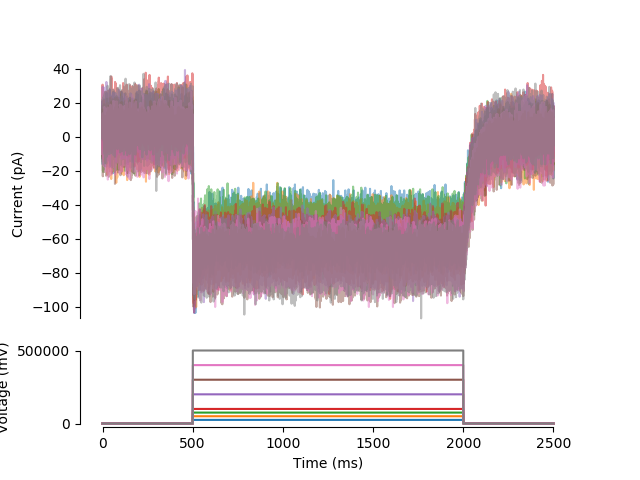

<IPython.core.display.Javascript object>


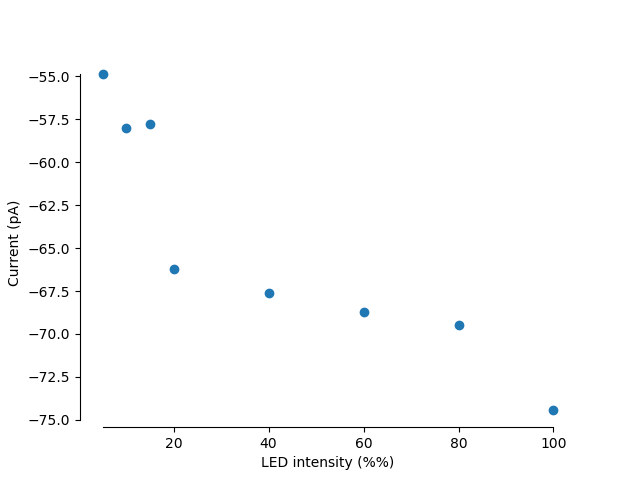

In [51]:
fig, axi, axv = plot.plot_traces(mode='vclamp')
steadystates = []
percents = []
for data, percent in datas:

    pulses = []
    peaks = []

    dt = data['dt']
    meansweep = np.mean([sweep for sweep in data['AI0']], axis=0)
    baseline = np.mean(meansweep[:int((lightpulsedelay-5)/dt)])
    steadystate = np.mean(meansweep[
        int((lightpulsedelay+lightpulseduration-100)/dt):
        int((lightpulsedelay+lightpulseduration)/dt)])
    steadystates.append(steadystate)
    percents.append(percent)
    times = np.arange(meansweep.shape[0])*data['dt']
    axi.plot(times, sweep, alpha=0.5)
    axv.plot(times, data['AO1'][0]*percent)
    
fig, ax = plot.plot_iv(zeroori=False, xlabel="LED intensity (%%)")
ax.plot(percents, steadystates, 'o')


# Steady-state Nav channel fast inactivation

In [15]:
data = tdms.read_tdms("C:\Users\Hannah Phillips\Desktop\CSHL\Cell5inactivation.tdms")

In [16]:
pulsebasedelay = 10
pulsedelay = 30
pulsedur = 100
holding = -80
print(data['dt'])

0.04


<IPython.core.display.Javascript object>


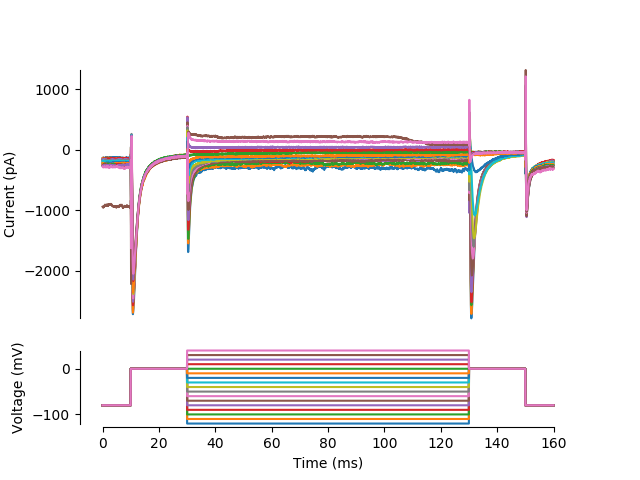

[-40.33354304 -15.19502202]


<IPython.core.display.Javascript object>


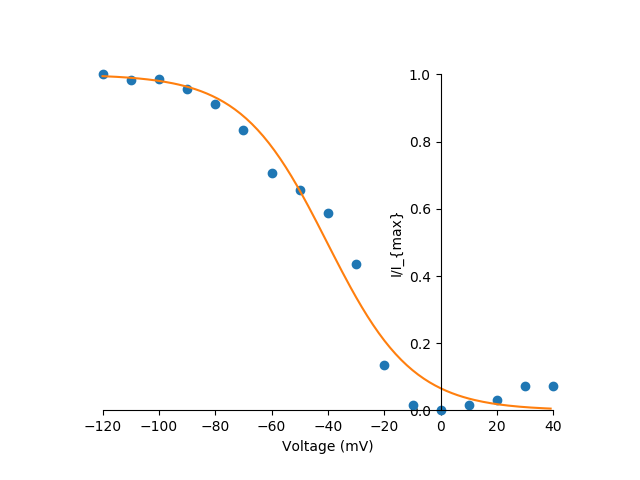

In [17]:
fig, axi, axv = plot.plot_traces(mode='vclamp')

pulses = []
peaks = []

dt = data['dt']
for sweep, command in zip(data['AI0'], data['AO0']): 
    pulsebase = np.mean(command[:int(pulsebasedelay/dt)])
    pulsemax = np.max(command[
        int((pulsedelay+5.0)/dt):
        int((pulsedelay+pulsedur)/dt)]-pulsebase)
    pulsemin = np.min(command[
        int((pulsedelay+5.0)/dt):
        int((pulsedelay+pulsedur)/dt)]-pulsebase)
    if np.abs(pulsemax) > np.abs(pulsemin):
        pulseamp = pulsemax+holding
    else:
        pulseamp = pulsemin+holding
    pulses.append(pulseamp)

    baseline = np.mean(sweep[:int(pulsebasedelay/dt)])
    minrefpeak = np.min(sweep[int((pulsebasedelay+0.3)/dt):int((pulsebasedelay+20.0)/dt)])
    mintestpeak = np.min(sweep[int((pulsedelay+pulsedur+0.3)/dt):int((pulsedelay+pulsedur+20.0)/dt)])
    peaks.append(mintestpeak/minrefpeak)

    times = np.arange(sweep.shape[0])*data['dt']
    axi.plot(times, sweep)
    axv.plot(times, holding + command)
    
peaks = np.array(peaks)
peaks -= peaks.min()
peaks /= peaks.max()
    
# Plot conductance-voltage relationship
v50_init = 0.0
slope_init = -1.0
gfit = functions.leastsq(
    functions.leastsq_helper, (v50_init, slope_init), args=(peaks, functions.fboltz_up, pulses))[0]
print(gfit)
curverange = np.arange(np.min(pulses), np.max(pulses), 1.0)
curvefit = functions.fboltz_up(gfit, curverange)

fig, ax = plot.plot_iv(ylabel=r"I/I_{max}")
ax.plot(pulses, peaks, 'o')
ax.plot(curverange, curvefit)
ax.plot()

plt.show()    

# Recovery from inactivation

In [76]:
data = tdms.read_tdms("/Users/Michael/Desktop/Ion Channels CSHL/Data/Lab11 Opto/Cell 5/Opto-cell5_recovery-0-505392262.tdms")

In [77]:
lightpulsedelay = 500
lightpulsedur = 1500
recovery_t0 = 12010.0
recovery_dt = -1000.0
holding = -60
print(data['dt'])

0.04


<IPython.core.display.Javascript object>


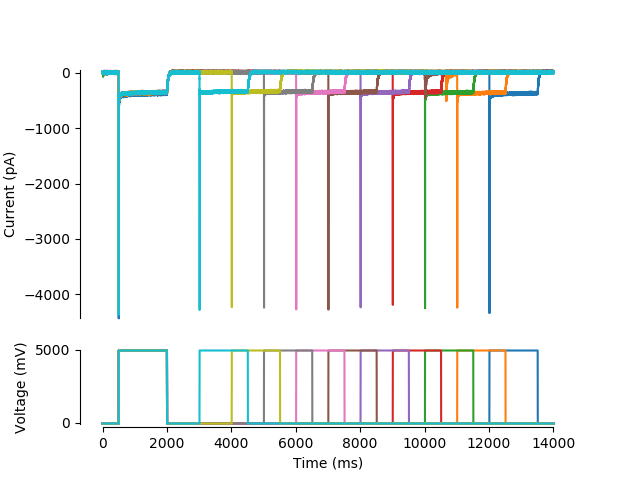

<IPython.core.display.Javascript object>


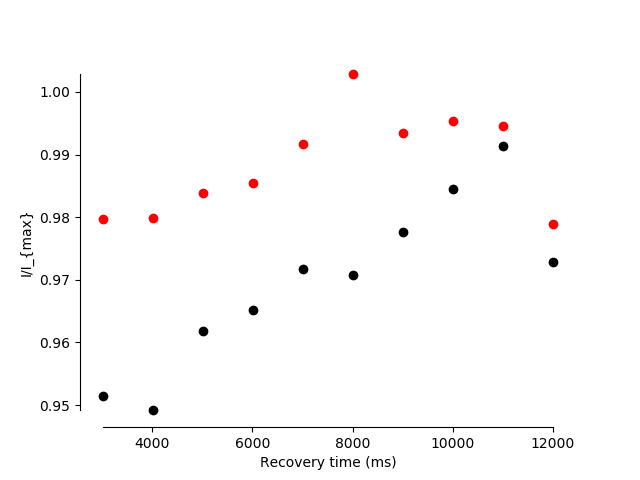

In [82]:
fig, axi, axv = plot.plot_traces(mode='vclamp')

pulses = []
steadys = []
peaks = []
recovery_ts = []

dt = data['dt']
recovery_t = recovery_t0
for sweep, command in zip(data['AI0'], data['AO1']):
    baseline = np.mean(sweep[:int(lightpulsedelay/dt)])
    control_meanpeak = np.mean(sweep[
        int((lightpulsedelay+lightpulsedur-100)/dt):
        int((lightpulsedelay+lightpulsedur)/dt)]-baseline)
    meanpeak = np.mean(sweep[
        int((recovery_t+lightpulsedur-100)/dt):
        int((recovery_t+lightpulsedur)/dt)]-baseline)
    control_minpeak = np.min(sweep[
        int((lightpulsedelay)/dt):
        int((lightpulsedelay+lightpulsedur)/dt)]-baseline)
    minpeak = np.min(sweep[
        int((recovery_t)/dt):
        int((recovery_t+lightpulsedur)/dt)]-baseline)
    steadys.append(meanpeak/control_meanpeak)
    peaks.append(minpeak/control_minpeak)
    recovery_ts.append(recovery_t)
    
    times = np.arange(sweep.shape[0])*data['dt']
    axi.plot(times, sweep)
    axv.plot(times, holding + command)
    
    recovery_t += recovery_dt

recovery_ts = np.array(recovery_ts)

#fitrange = np.arange(np.min(recovery_ts), np.max(recovery_ts), 0.1)
#taufit = functions.leastsq(
#    functions.leastsq_helper, (-1.0, 10.0, 1.0),
#    args=(peaks, functions.fexp, recovery_ts))[0]
#print(taufit[1])
#plottau = functions.fexp(taufit, fitrange)

fig, ax = plot.plot_iv(xlabel='Recovery time (ms)', zeroori=False, ylabel=r"I/I_{max}")
ax.plot(recovery_ts, steadys, 'ok')
ax.plot(recovery_ts, peaks, 'or')
#ax.plot(fitrange, plottau)

plt.show()